## **I. IMPORTAR LIBRERIAS**

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl

In [3]:
from math import sqrt
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image 
from scipy.stats import kde

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [5]:
import sklearn as skl
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## **II.CARGAR DATASET**

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
dataset= pd.read_csv("gdrive/MyDrive/DATA/HEALTH_INSURANCE/insurance.csv", engine='python')

## **III.DESPLEGAR INFORMACION DATASET**

In [ ]:
dataset.info()
print("\n")
print("Database size:",dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Database size: (1338, 7)


In [ ]:
print(dataset.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## **IV.VISUALIZACION CARACTERISTICAS DATASET**

In [ ]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

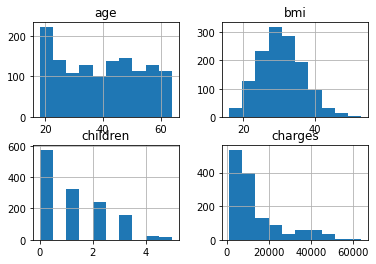

In [ ]:
dataset.drop(['sex','smoker','region'],1).hist()
plt.show()

### **a. Convertir *Categorias* en *Valores***

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])
dataset['region'] = le.fit_transform(dataset['region'])

In [ ]:
dataset['smoker'].head()

## **V. GRAFICOS-HIPÓTESIS**

In [21]:
X=dataset['age'].values
Y=dataset['charges'].values
Z=dataset['bmi'].values

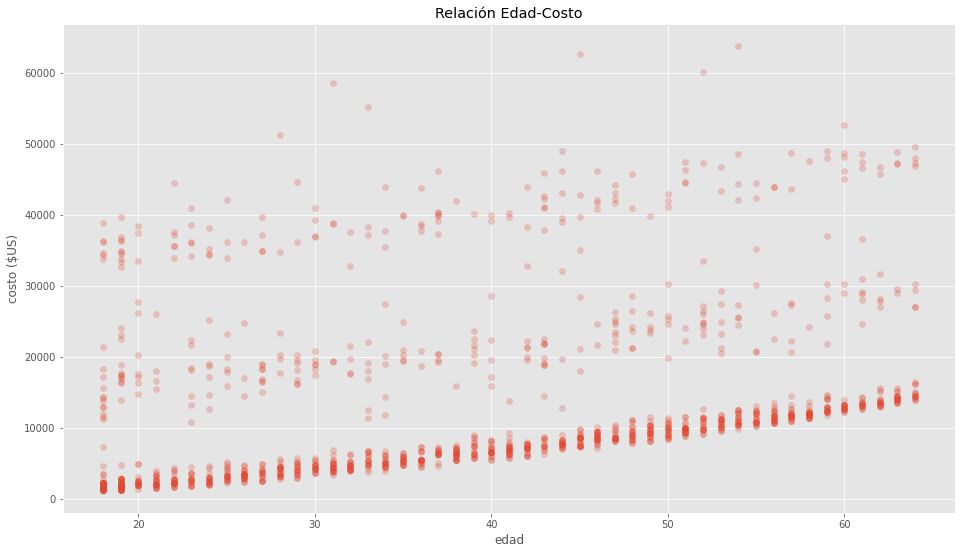

In [32]:
def rel_edad_costo (edad,costo) :
  return np.corrcoef(edad,costo)[0,1]

plt.title('Relación Edad-Costo')
plt.scatter(dataset['age'].values, dataset['charges'].values, alpha=0.25)
plt.xlabel('edad')
plt.ylabel('costo ($US)')
plt.show()

> Se hace evidente el incremento del costo de la póliza respecto a la edad del asegurado.

In [10]:
colores=['blue','yellow','orange','red']
tamanios=[30,60]

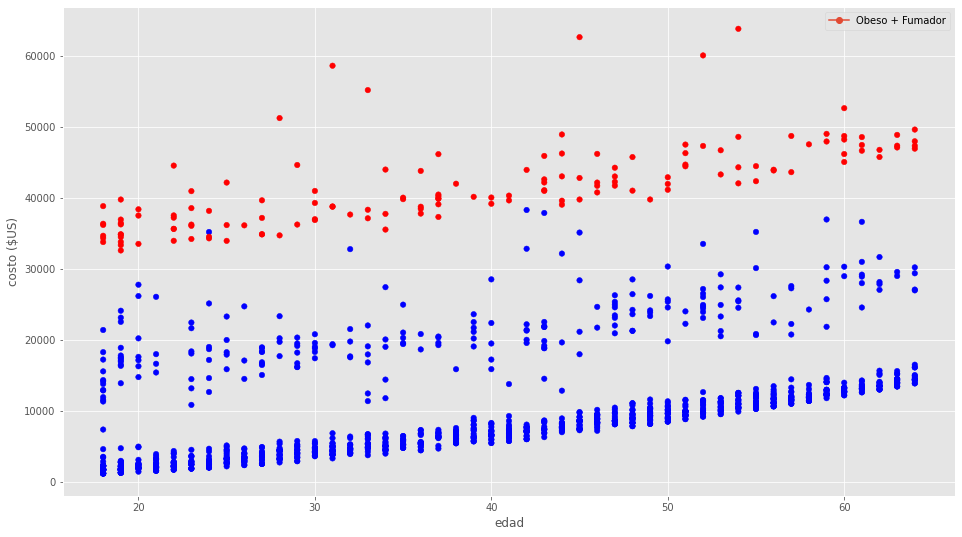

In [38]:
asignar=[]
lista1=[]
lista2=[]
for index, row in dataset.iterrows():
    if(row["bmi"] >30) & (row["smoker"] == 'yes'):
        asignar.append(colores[3])
        lista1.append
    else:
        asignar.append(colores[0])
        lista2.append

plt.scatter(X, Y, c=asignar, s=tamanios[0])
plt.xlabel('edad')
plt.ylabel('costo ($US)')
plt.plot(lista1, label = "Obeso + Fumador", marker = 'o')
plt.legend()
plt.show()

>Podemos observar aquí que, si se tiene como **factores de riesgo** ser *obeso* y *fumador*, la comisión de seguro de salud en ningún caso es menor a $30.000.

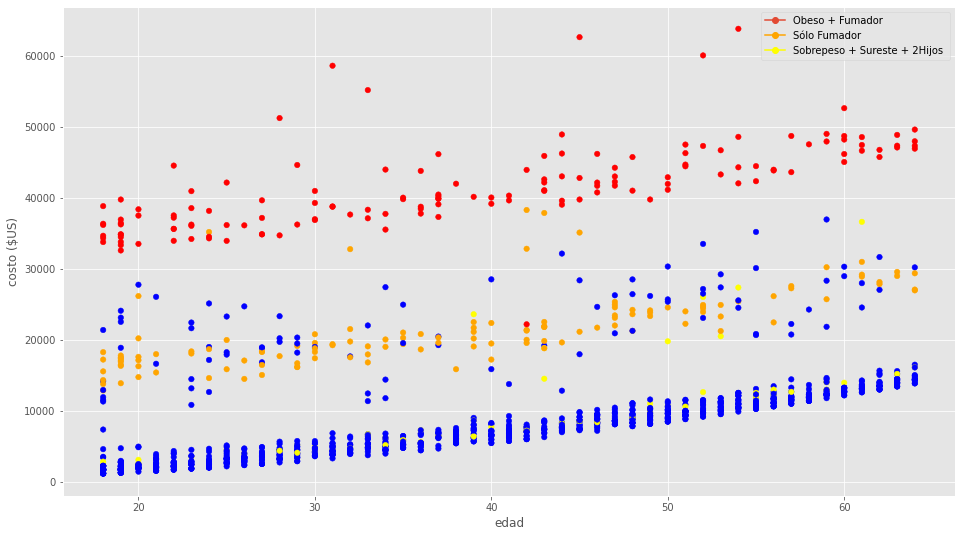

In [40]:
asignar=[]
lista1=[]
lista2=[]
lista3=[]
for index, row in dataset.iterrows():
    if((row['bmi'] >= 30) & (row["smoker"]=='yes')):
        asignar.append(colores[3])
        lista1.append
    else:
      if(row["smoker"]=='yes'):
        asignar.append(colores[2])
        lista2.append
      else:
        if(row["bmi"] >= 25 ) & (row['region'] == 'southeast') & (row["children"] >=2):
          asignar.append(colores[1])
          lista3.append
        else:
          asignar.append(colores[0])
    
plt.scatter(X, Y, c=asignar, s=tamanios[0])
plt.xlabel('edad')
plt.ylabel('costo ($US)')
plt.plot(lista1, label = "Obeso + Fumador", marker = 'o')
plt.plot(lista2, label = "Sólo Fumador", marker = 'o', color = "orange")
plt.plot(lista3, label = "Sobrepeso + Sureste + 2Hijos ", marker = 'o', color= "yellow")
plt.legend()
plt.show()

>Aquí se puede ver que, si se tiene como único **factor de riesgo** *ser fumador*, el costo del seguro de salud en ningún caso será menor a $10.000.

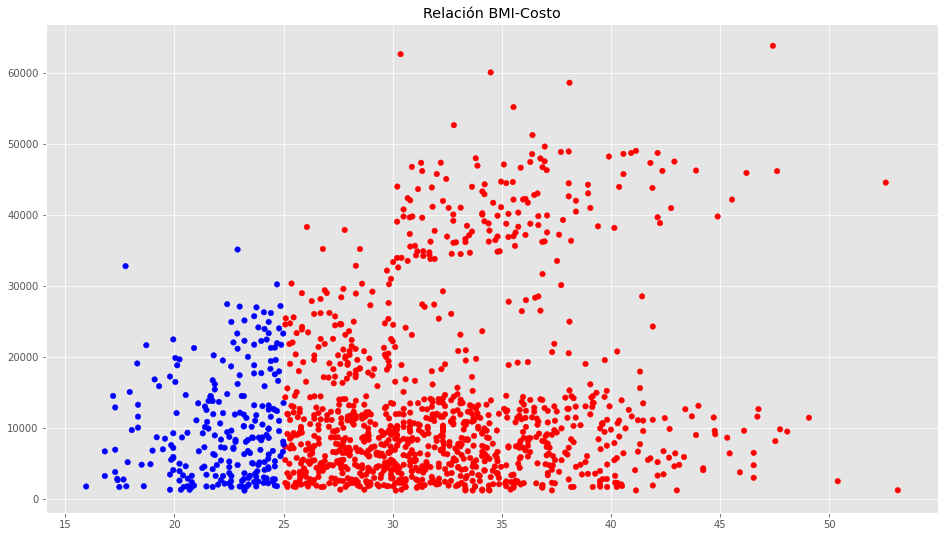

In [44]:
asignar=[]
for index, row in dataset.iterrows():
    if(row["bmi"] >25):
        asignar.append(colores[3])
    else:
        asignar.append(colores[0]) 
plt.title('Relación BMI-Costo')
plt.scatter(Z, Y, c=asignar, s=tamanios[0])
plt.show()

>Existe una relación Costo-Indice de Masa Corporal -coeficiente no evidente-. El incremento en el costo está vinculado con la aparición de factores adicionales (e.g. número de hijos, edad, fumador, etc.)

## **VI. MODELOS DE REGRESION LINEAR**



### UNO -VARIABLE SIMPLE-


In [ ]:
dataX =dataset[["age"]]
X_train = np.array(dataX)
y_train = dataset['charges'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [257.72261867]
Independent term: 
 3165.885006063021
Mean squared error: 133440978.61
Variance score: 0.09


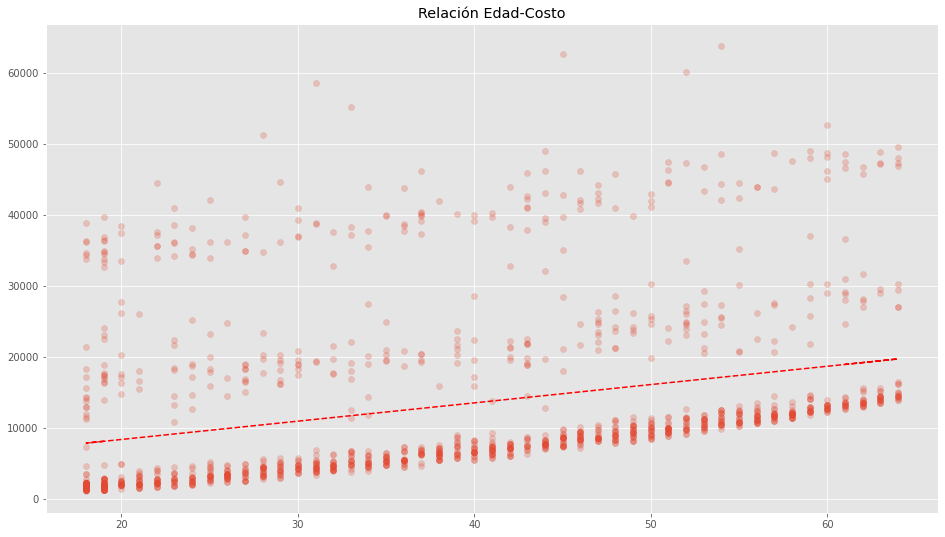

In [ ]:
plt.plot(X,y_pred,'r--')
plt.title('Relación Edad-Costo')
plt.scatter(dataset['age'].values, dataset['charges'].values, alpha=0.25)
plt.show()

 ### DOS [MULTIVARIABLE] -ESTA MAL-


In [ ]:
suma = (dataset["smoker"] + dataset['bmi'])
 
dataX2 =  pd.DataFrame()
dataX2["age"] = dataset["age"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = dataset['charges'].values

In [ ]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [237.33924704 436.39010906]
Mean squared error: 126411777.06
Variance score: 0.14


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

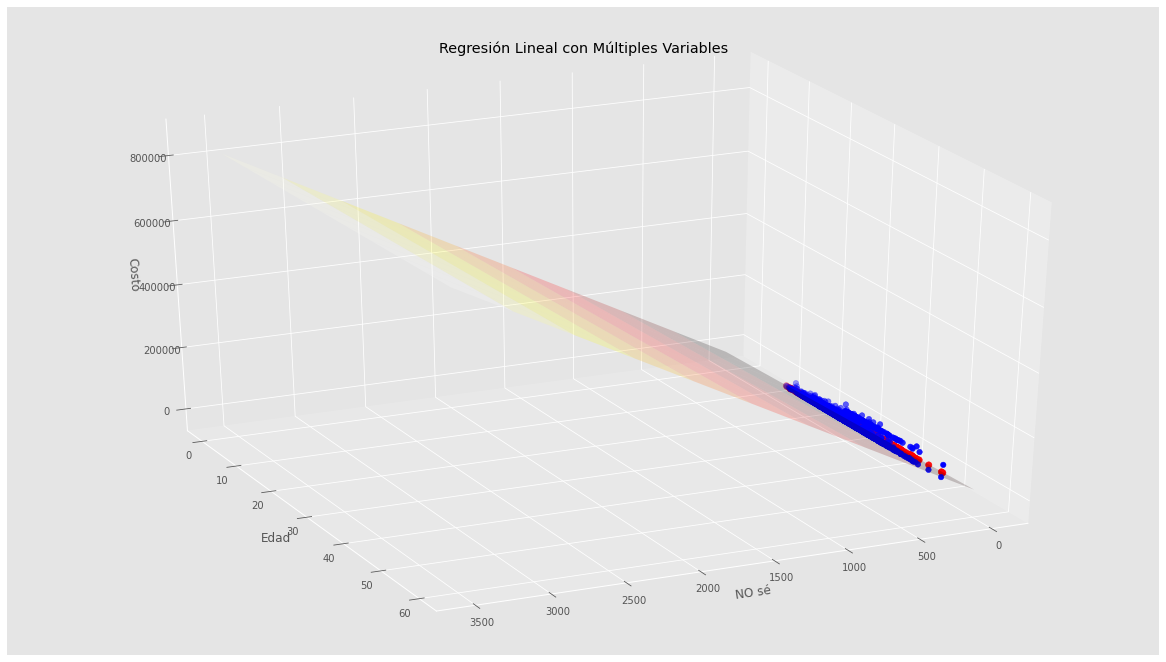

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
 
# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
 
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
 
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
 
# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('NO sé')
ax.set_ylabel('Edad')
ax.set_zlabel('Costo')
ax.set_title('Regresión Lineal con Múltiples Variables')


## OJO Dividir Data

In [ ]:
X = dataset.drop('charges',axis=1)
y = dataset['charges']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

##*ALGUNOS CRITERIOS*

In [ ]:
dataset[(dataset["bmi"] >30) & (dataset["smoker"]== 1) & (dataset["charges"] <= 35000)].info()

In [ ]:
print(dataset[(dataset["bmi"] >30) & (dataset["smoker"]== 1)].to_string())

In [ ]:
risk_factor = dataset[(dataset["bmi"] >30) & (dataset["smoker"]==1)]

In [ ]:
print(dataset[(dataset["age"] >=44) & (dataset["age"] <=56) & (dataset['charges'] < 30000) & (dataset['charges'] > 10000)& (dataset["smoker"]== 0)].to_string())